In [4]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [5]:
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model

df = pd.read_csv("C:/Users/user/Desktop/2024 2학기/딥러닝 응용/4주차/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [6]:
# 컬렴명 확인
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [7]:
y=df['activity']
y.value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [8]:
df_filtered = df[df['activity'].isin(['lyingRigh', 'lyingBack','standing'])]
df_filtered = df_filtered.drop('people', axis=1)
df_filtered.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
480,8.416815,8.5783,8.3103,0.002356,0.048537,0.867785,0.571528,0.73677,0.35819,0.004036,...,1.278649e-06,0.001131,0.243260,0.644246,0.64700,0.64109,0.000002,0.001313,-0.184083,standing
481,8.439497,8.6153,8.1908,0.005754,0.075855,0.092156,0.499881,0.63267,0.32807,0.004515,...,2.816324e-06,0.001678,0.391596,0.643432,0.64789,0.63942,0.000003,0.001805,0.239917,standing
482,8.442786,8.5184,8.3690,0.000786,0.028033,0.096127,0.429967,0.59482,0.32835,0.001260,...,1.760422e-06,0.001327,0.753549,0.643036,0.64646,0.64019,0.000002,0.001447,0.178525,standing
483,8.444243,8.5480,8.3692,0.001558,0.039470,0.361301,0.414673,0.49073,0.33563,0.000867,...,1.218089e-05,0.003490,0.178568,0.643370,0.64657,0.64004,0.000003,0.001771,0.080492,standing
484,8.347373,8.4138,8.2791,0.000774,0.027822,0.018596,0.441606,0.52153,0.37246,0.001067,...,8.834185e-07,0.000940,-0.237978,0.643874,0.64611,0.64063,0.000001,0.001219,-0.291443,standing


In [9]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_filtered['activity'] = label_encoder.fit_transform(df_filtered['activity'])

df_filtered.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
480,8.416815,8.5783,8.3103,0.002356,0.048537,0.867785,0.571528,0.73677,0.35819,0.004036,...,1.278649e-06,0.001131,0.243260,0.644246,0.64700,0.64109,0.000002,0.001313,-0.184083,2
481,8.439497,8.6153,8.1908,0.005754,0.075855,0.092156,0.499881,0.63267,0.32807,0.004515,...,2.816324e-06,0.001678,0.391596,0.643432,0.64789,0.63942,0.000003,0.001805,0.239917,2
482,8.442786,8.5184,8.3690,0.000786,0.028033,0.096127,0.429967,0.59482,0.32835,0.001260,...,1.760422e-06,0.001327,0.753549,0.643036,0.64646,0.64019,0.000002,0.001447,0.178525,2
483,8.444243,8.5480,8.3692,0.001558,0.039470,0.361301,0.414673,0.49073,0.33563,0.000867,...,1.218089e-05,0.003490,0.178568,0.643370,0.64657,0.64004,0.000003,0.001771,0.080492,2
484,8.347373,8.4138,8.2791,0.000774,0.027822,0.018596,0.441606,0.52153,0.37246,0.001067,...,8.834185e-07,0.000940,-0.237978,0.643874,0.64611,0.64063,0.000001,0.001219,-0.291443,2


In [10]:
df_filtered['activity'].value_counts()

activity
2    480
0    480
1    480
Name: count, dtype: int64

In [11]:
LABELS = ["Normal", "Abnormal"]

In [12]:
normal = df_filtered[(df_filtered.activity == 1) | (df_filtered.activity == 0)]
abnormal = df_filtered[df_filtered.activity == 2]
normal.shape

(960, 271)

In [13]:
abnormal.shape

(480, 271)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_filtered, test_size=0.2, random_state=20)

X_train.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
731,9.077878,9.1529,8.98830,0.001406,0.037490,-0.350607,-0.031030,0.039456,-0.108910,0.000793,...,6.014640e-06,0.002452,0.188962,0.252521,0.25595,0.24998,1.541641e-06,0.001242,0.457545,2
1014,-4.634902,-4.5576,-4.70720,0.001062,0.032595,-0.022600,-0.661550,-0.602460,-0.749640,0.000870,...,4.187223e-07,0.000647,0.278959,-0.525365,-0.52338,-0.52752,5.237589e-07,0.000724,0.128404,0
1123,-3.409643,-3.3525,-3.44950,0.000450,0.021217,0.131701,0.089917,0.179250,-0.013255,0.000816,...,6.329016e-07,0.000796,0.109761,0.958187,0.95964,0.95647,4.227273e-07,0.000650,-0.108056,0
735,9.054246,9.2120,8.95820,0.003003,0.054796,0.276950,-0.041460,0.083446,-0.138480,0.002115,...,2.085310e-05,0.004567,-0.267762,0.257415,0.26091,0.25419,2.577896e-06,0.001606,0.023234,2
1739,-0.526025,-0.4724,-0.58415,0.000481,0.021937,-0.224470,-9.782885,-9.700400,-9.899600,0.000914,...,5.670998e-07,0.000753,-0.023755,-0.615915,-0.61433,-0.61733,4.237524e-07,0.000651,-0.076690,1


In [15]:
X_train, X_valid = train_test_split(X_train, test_size=0.25, random_state=21)

X_valid.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
1463,2.365560,2.4272,2.2777,0.000805,0.028365,-0.545450,-7.652670,-7.55460,-7.74680,0.001449,...,5.740973e-07,0.000758,0.235143,-0.373628,-0.37167,-0.37533,4.783615e-07,0.000692,0.264092,1
1013,-4.603154,-4.5278,-4.7222,0.001711,0.041362,-0.182212,-0.646038,-0.57341,-0.76435,0.001238,...,4.786189e-07,0.000692,0.000160,-0.523315,-0.52116,-0.52624,9.432107e-07,0.000971,-0.472785,0
1343,-4.521922,-4.3748,-4.6356,0.002792,0.052843,0.704604,1.205486,1.27040,1.10700,0.001263,...,5.324135e-07,0.000730,-0.071319,-0.120549,-0.11848,-0.12278,4.860706e-07,0.000697,0.166866,0
1215,-3.876310,-3.7489,-3.9875,0.002662,0.051592,0.608350,-0.551745,-0.46725,-0.64575,0.000845,...,4.857883e-07,0.000697,0.082178,0.631350,0.63333,0.62947,5.223330e-07,0.000723,0.275218,0
1412,-1.691171,-1.5914,-1.7594,0.001685,0.041043,0.118500,-2.273141,-2.22180,-2.39100,0.000876,...,4.230713e-05,0.006504,0.175914,-0.637476,-0.61411,-0.66305,5.997596e-05,0.007744,-0.170298,0


In [16]:
X_train = X_train[(X_train.activity == 1) | (X_train.activity == 0)]
X_valid = X_valid[(X_valid.activity == 1) | (X_valid.activity == 0)]

y_train = X_train['activity']
y_valid = X_valid['activity']

X_train = X_train.drop(['activity'], axis=1)
X_valid = X_valid.drop(['activity'], axis=1)

X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
1856,0.371838,0.42705,0.33746,0.000436,0.020890,0.657547,-8.417251,-8.35530,-8.50320,0.000979,...,-0.444050,5.423731e-07,0.000736,0.279317,-0.852721,-0.85123,-0.85501,4.734747e-07,0.000688,-0.205382
1664,1.520420,1.78280,1.35220,0.002651,0.051488,1.353877,-6.284871,-6.10250,-6.48680,0.003308,...,-0.470400,1.122490e-06,0.001059,0.513350,-0.459768,-0.45828,-0.46215,5.363030e-07,0.000732,-0.435293
1064,-2.077142,-1.99350,-2.14300,0.001121,0.033477,0.183505,-0.461164,-0.32513,-0.63003,0.002168,...,0.756940,5.787645e-07,0.000761,0.046344,0.314692,0.31720,0.30995,2.544147e-06,0.001595,-0.623107
1883,2.621400,2.66250,2.57470,0.000317,0.017805,-0.289790,-9.383018,-9.33720,-9.42230,0.000234,...,-0.543150,6.555339e-05,0.008097,0.167483,-0.409869,-0.38181,-0.43130,6.500261e-05,0.008062,0.226276
1397,-1.695679,-1.63980,-1.77230,0.000642,0.025336,-0.331721,-2.289285,-2.17180,-2.42200,0.001441,...,0.328690,5.706433e-05,0.007554,0.285436,-0.630179,-0.60165,-0.65749,7.355838e-05,0.008577,0.173228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,-3.132678,-3.08360,-3.18760,0.000342,0.018490,0.022201,-8.911393,-8.82710,-8.98990,0.000728,...,-0.255300,6.392651e-07,0.000800,0.011861,-0.805341,-0.80343,-0.80744,4.865310e-07,0.000698,0.067764
1908,2.615501,2.65270,2.57710,0.000193,0.013907,-0.316697,-9.393974,-9.34970,-9.42240,0.000170,...,-0.546170,8.157775e-05,0.009032,0.184982,-0.411386,-0.37905,-0.43545,8.429205e-05,0.009181,0.321726
1537,0.225677,0.26380,0.17412,0.000347,0.018641,-0.410825,-9.258578,-9.18300,-9.31620,0.000389,...,-0.004041,1.786973e-06,0.001337,-0.139080,-0.911491,-0.90941,-0.91392,6.038471e-07,0.000777,-0.243116
1912,2.623026,2.65280,2.57420,0.000249,0.015778,-0.546759,-9.389546,-9.34580,-9.43060,0.000261,...,-0.536980,5.988166e-05,0.007738,0.863919,-0.410797,-0.37984,-0.43554,7.828240e-05,0.008848,0.094922


In [17]:
y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)

X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
1107,-3.357249,-3.2851,-3.4117,0.000659,0.025666,0.352065,0.071290,0.179880,-0.042196,0.001271,...,0.19036,7.844760e-07,0.000886,0.096218,0.954609,0.95691,0.95283,4.571673e-07,0.000676,0.066111
1383,-1.736307,-1.6861,-1.8231,0.000954,0.030895,-0.742879,-2.279421,-2.202700,-2.359400,0.001100,...,0.32731,6.310333e-05,0.007944,0.862123,-0.633137,-0.61290,-0.66801,7.066739e-05,0.008406,-1.760008
1231,-3.835801,-3.7116,-3.9576,0.004412,0.066426,0.151410,-0.507295,-0.425300,-0.573120,0.000530,...,0.30401,6.165155e-07,0.000785,0.212013,0.635006,0.63731,0.63314,6.101636e-07,0.000781,0.004581
900,9.763670,9.8463,9.6663,0.001010,0.031784,-0.405107,0.368034,0.511890,0.232680,0.002753,...,-0.35721,5.827993e-05,0.007634,0.262789,0.197416,0.22681,0.17346,6.650366e-05,0.008155,0.492363
801,9.320821,9.3928,9.2236,0.001053,0.032445,-0.440735,-0.123459,-0.035038,-0.206330,0.001152,...,0.25676,1.705607e-05,0.004130,-0.246210,0.518806,0.54218,0.49492,2.593524e-05,0.005093,-0.069526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,2.577734,2.6228,2.5326,0.000267,0.016327,-0.010355,-9.377945,-9.344100,-9.411300,0.000147,...,-0.54181,8.769591e-05,0.009365,0.423319,-0.412191,-0.38602,-0.43207,7.750734e-05,0.008804,0.415572
724,8.914973,9.0480,8.6892,0.006902,0.083078,-0.658142,-0.044312,0.098057,-0.182840,0.004133,...,0.23672,8.097506e-05,0.008999,0.397101,0.258693,0.26439,0.25394,9.234422e-06,0.003039,0.015279
760,9.024804,9.1382,8.8992,0.002202,0.046928,-0.042817,0.095917,0.201890,-0.019686,0.000951,...,0.23238,1.356933e-05,0.003684,0.024002,0.252682,0.25518,0.24924,1.586848e-06,0.001260,-0.750178
1591,4.267896,4.3992,4.1607,0.001389,0.037268,-0.154858,-8.692432,-8.550800,-8.788200,0.001258,...,0.80829,1.878025e-06,0.001370,-0.139138,-0.530749,-0.52739,-0.53449,2.891508e-06,0.001700,-0.220361


In [18]:
# X_train과 X_test를 넘파이 배열로 변환
X_train = X_train.values
X_test = X_test.values

X_train

array([[ 3.71838160e-01,  4.27050000e-01,  3.37460000e-01, ...,
         4.73474748e-07,  6.88095014e-04, -2.05382219e-01],
       [ 1.52042000e+00,  1.78280000e+00,  1.35220000e+00, ...,
         5.36303006e-07,  7.32327117e-04, -4.35293202e-01],
       [-2.07714240e+00, -1.99350000e+00, -2.14300000e+00, ...,
         2.54414699e-06,  1.59503824e-03, -6.23106696e-01],
       ...,
       [ 2.25677440e-01,  2.63800000e-01,  1.74120000e-01, ...,
         6.03847058e-07,  7.77075967e-04, -2.43116406e-01],
       [ 2.62302640e+00,  2.65280000e+00,  2.57420000e+00, ...,
         7.82823977e-05,  8.84773405e-03,  9.49223135e-02],
       [ 4.58485600e-01,  5.16900000e-01,  4.12620000e-01, ...,
         5.48613316e-07,  7.40684357e-04,  2.71566778e-01]])

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [20]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 입력 차원 및 인코딩 차원 설정
input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정

# 오토인코더 모델
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_layer)  # 선형 인코더
encoded = Dense(int(encoding_dim / 2), activation='linear')(encoded)  # 더 작은 차원으로 인코딩

decoded = Dense(int(encoding_dim / 2), activation='linear')(encoded)  # 디코더, 인코딩된 벡터 복원
decoded = Dense(input_dim, activation='linear')(decoded)  # 원래 입력 차원으로 복원

# 모델 컴파일 및 구조 출력
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 270)]             0         
                                                                 
 dense (Dense)               (None, 14)                3794      
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 270)               2160      
                                                                 
Total params: 6,115
Trainable params: 6,115
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
3/3 [==============================] - 2s 318ms/step - loss: 5.9628 - val_loss: 6.4600
Epoch 2/50
3/3 [==============================] - 0s 20ms/step - loss: 5.7391 - val_loss: 6.3021
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 5.6070 - val_loss: 6.2049
Epoch 4/50
3/3 [==============================] - 0s 20ms/step - loss: 5.5256 - val_loss: 6.1401
Epoch 5/50
3/3 [==============================] - 0s 21ms/step - loss: 5.4708 - val_loss: 6.0926
Epoch 6/50
3/3 [==============================] - 0s 21ms/step - loss: 5.4279 - val_loss: 6.0495
Epoch 7/50
3/3 [==============================] - 0s 21ms/step - loss: 5.3860 - val_loss: 6.0007
Epoch 8/50
3/3 [==============================] - 0s 20ms/step - loss: 5.3374 - val_loss: 5.9455
Epoch 9/50
3/3 [==============================] - 0s 18ms/step - loss: 5.2828 - val_loss: 5.8812
Epoch 10/50
3/3 [==============================] - 0s 19ms/step - loss: 5.2190 - val_loss: 5.8040
Epoch 11/50
3/3 [===========

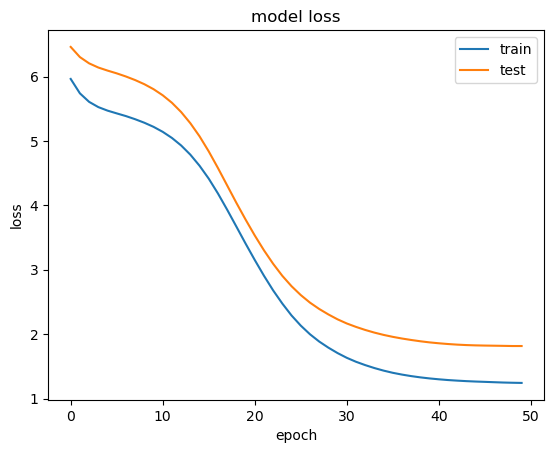

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [23]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

9/9 [==============================] - 0s 3ms/step


,reconstruction_error,true_class
count,288.000000,288.000000
mean,2.662711,0.993056
std,2.072829,0.830570
min,0.230791,0.000000
25%,0.921913,0.000000
50%,1.851046,1.000000
75%,5.309055,2.000000
max,5.851238,2.000000


In [24]:
error_df.head()

,reconstruction_error,true_class
1107,1.924077,0
1383,0.887120,0
1231,0.445254,0
900,5.483833,2
801,5.285196,2


In [25]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 30

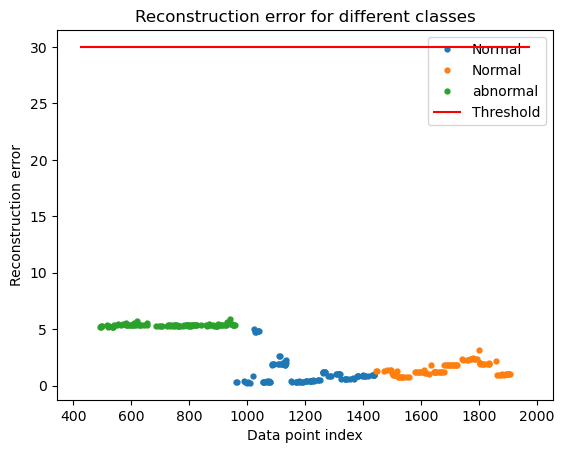

In [26]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "abnormal" if name == 2 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

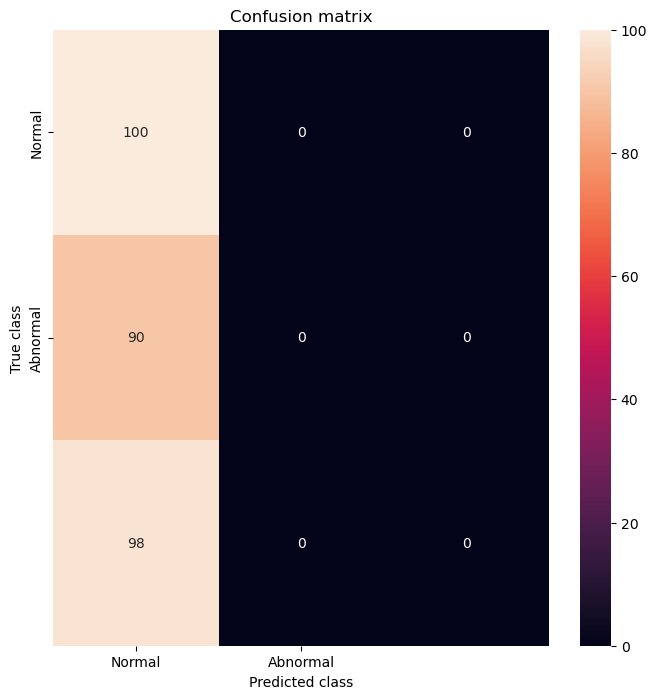

              precision    recall  f1-score   support

           0       0.35      1.00      0.52       100
           1       0.00      0.00      0.00        90
           2       0.00      0.00      0.00        98

    accuracy                           0.35       288
   macro avg       0.12      0.33      0.17       288
weighted avg       0.12      0.35      0.18       288



C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

## denoise autoencoder

train data-> noise 와 noise없는거로 분리하기
test data->noise 섞여 있는거 
